# MACHINE LEARNING
**Lab-07: DECISION TREE & RANDOM FOREST**

---
*IDE: Colaboratory / Google Colab*

*Nguyen Duy Thanh - MSSV:18110013*

*email: duythanh.ndt273@gmail.com or 18110013@stduent.hcmus.edu.vn*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Câu 1 :
Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt1.csv", header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [3]:
# Chia ra tập training và tập testing
X = df.drop(['class'], axis=1)

y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [4]:
!pip install category_encoders

In [5]:
#convert các feature từ string sang int
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [6]:
from sklearn.tree import DecisionTreeClassifier
max_depth_val = []
accuracy_val = []
accuracy_train = []
for i in range(0,15):
    clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0, max_features=None) 
  
    # fit the model
    clf_gini.fit(X_train, y_train)

    # Tính accuracy
    accuracy = clf_gini.score(X_test,y_test)
    print('max_depth = ', i+1, ' ,','Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy))

    #Check accuracy trên tập training để xem model có bị overfitting hay không
    y_pred_train_gini = clf_gini.predict(X_train)
    print('Training-set accuracy score: {0:0.4f}'. format(clf_gini.score(X_train,y_train)))
    print()


    max_depth_val.append(i+1)
    accuracy_val.append(accuracy)
    accuracy_train.append(clf_gini.score(X_train,y_train))

max_depth =  1  , Model accuracy score with criterion gini index: 0.6953
Training-set accuracy score: 0.7027

max_depth =  2  , Model accuracy score with criterion gini index: 0.8004
Training-set accuracy score: 0.7666

max_depth =  3  , Model accuracy score with criterion gini index: 0.8021
Training-set accuracy score: 0.7865

max_depth =  4  , Model accuracy score with criterion gini index: 0.8424
Training-set accuracy score: 0.8341

max_depth =  5  , Model accuracy score with criterion gini index: 0.8704
Training-set accuracy score: 0.8634

max_depth =  6  , Model accuracy score with criterion gini index: 0.8949
Training-set accuracy score: 0.9067

max_depth =  7  , Model accuracy score with criterion gini index: 0.9159
Training-set accuracy score: 0.9378

max_depth =  8  , Model accuracy score with criterion gini index: 0.9335
Training-set accuracy score: 0.9594

max_depth =  9  , Model accuracy score with criterion gini index: 0.9457
Training-set accuracy score: 0.9749

max_depth 

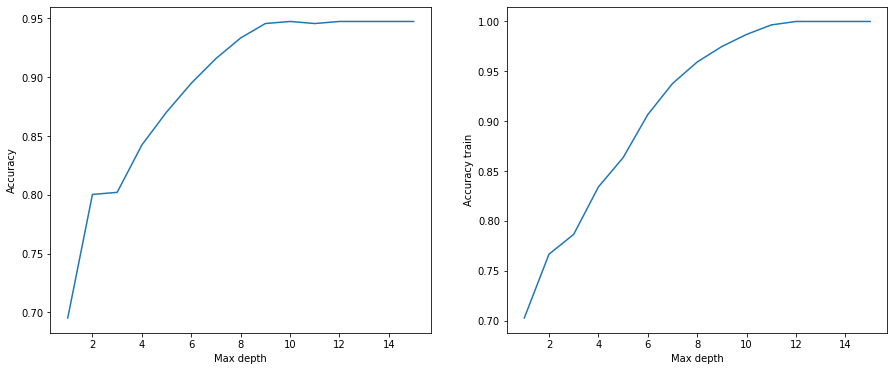

In [7]:
fix,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax1.plot(max_depth_val,accuracy_val)
ax1.set_xlabel('Max depth')
ax1.set_ylabel('Accuracy')

ax2.plot(max_depth_val,accuracy_train)
ax2.set_xlabel('Max depth')
ax2.set_ylabel('Accuracy train')

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


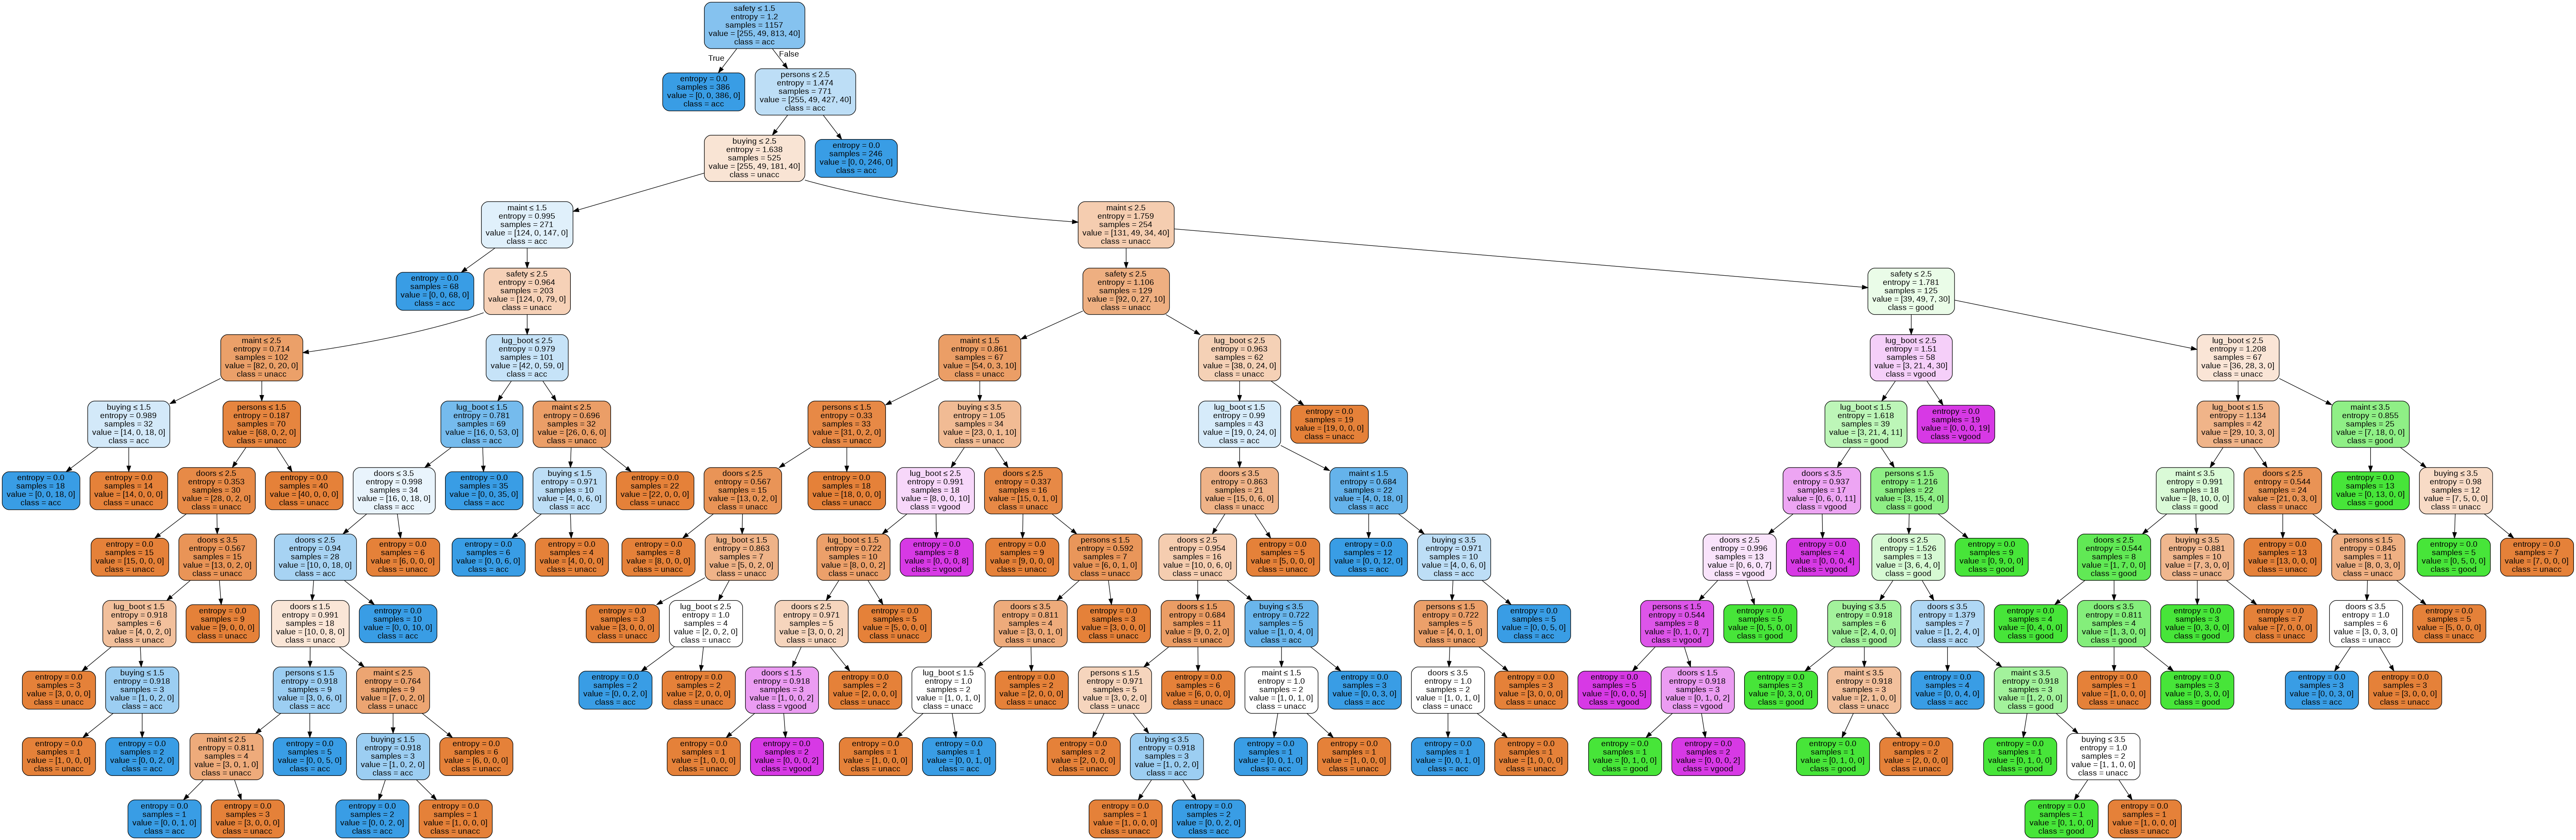

In [8]:
#Vẽ thử cây ra
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train.columns,class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Câu 2 :
max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?

### Nhận Xét :

*   max_depth = 1  $\Longrightarrow$  không nên chọn model vì ta chỉ chia làm 2 leaf node.
*   1 < max_depth < 6 $\Longrightarrow$ model overfitting.
*   max_depth $\geq$ 6 $\Longrightarrow$  model tốt.
*   max_depth = 12 $\Longrightarrow$ điều kiện dừng.

### Kết Luận :
max_depth có xu hướng càng lớn (cây càng sâu/cao) thì cho ra kết quả dự đoán càng tốt. Tuy nhiên thì nếu max_depth đạt đến ngưỡng quá cao có thể dẫn đến overfitting, vì khi cây càng sâu thì dự đoán đưa ra càng phức tạp và sát với dữ liệu training nhưng khi áp dụng mô hình trên với dữ liệu mới thì có thể không phù hợp.



## Câu 3 :
Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

In [9]:
data=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt2.csv")

col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [10]:
# Chia tập testing và traning
X = data[feature_cols]
y = data.Outcome

np.random.seed(1)
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(["Outcome"])], data["Outcome"], test_size=0.3, random_state=1)

In [11]:
def bootstrapping(X,y,n_samples):
    
    
    X1 = np.concatenate((X,np.array(y).reshape(-1,1)),axis = 1)
    np.random.shuffle(X1)

    ind = np.random.choice(a = n_samples,size = n_samples,replace = True)
    X = X1[ind][:, :-1]
    y = X1[ind][:,-1]
    return X,y

In [12]:
n_samples = X_train.shape[0]
k = 1000

y = []
for i in range(0,k):
    X_train1,y_train1 = bootstrapping(X_train,y_train,n_samples)
    clf2 = DecisionTreeClassifier(criterion='entropy',
                              splitter='best',
                              max_depth=7,
                              min_samples_split = 2,
                              random_state=0)
    
    clf2.fit(X_train1, y_train1)
    y.append(clf2.predict(X_test))

In [13]:
import collections
y = np.swapaxes(a=y, axis1=0, axis2=1)
        
predictions = []
for preds in y:
    counter = collections.Counter(preds)
    predictions.append(counter.most_common(1)[0][0])

In [14]:
accuracy = np.mean(predictions == y_test)
accuracy

0.7965367965367965

## Sử Dụng Random Forest trong thư viện Sklearn

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000,
                              criterion='gini',
                              max_depth=7,
                              max_features=None,
                              random_state=0)

clf.fit(X_train, y_train)
print(np.mean(clf.predict(X_test) == y_test))


0.8051948051948052
